In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import io as sio
from pathlib import Path

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# This is the path on the shared google drive provided by Philip
root_path_sim = Path('G:\\My Drive\\PhD\Papers\\Vanishing spikes\\all_data\\OSN_simulations')
path_exp_data = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys\\Or42bSF EtB\\step stim')

#save_path = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\Fig3_plots')
save_path = 'Declare path'

color_for_predicted = 'r'

aq_rate = 10000 # All ephys recordings were done at 10 kHz

sim_rate = 1000 # To be checked by Philip!

sim_files = [
    'Or42bSF EtB_EtB 500pM.mat',
    'Or42bSF EtB_EtB 1000pM.mat',
    'Or42bSF EtB_EtB 5000pM.mat',
    'Or42bSF EtB_EtB 10000pM.mat',
    'Or42bSF EtB_EtB 50000pM.mat',
    'Or42bSF EtB_EtB 100000pM.mat',
    'Or42bSF EtB_EtB 500000pM.mat',
    'Or42bSF EtB_EtB 1000000pM.mat',
    'Or42bSF EtB_EtB 5000000pM.mat',
    'Or42bSF EtB_EtB 10000000pM.mat',
    'Or42bSF EtB_EtB 100000000pM.mat',
    'Or42bSF EtB_EtB 1000000000pM.mat']

exp_file = [
    'EtB 500pM',
    'EtB 1000pM',
    'EtB 5000pM',
    'EtB 10000pM',
    'EtB 50000pM',
    'EtB 100000pM',
    'EtB 500000pM',
    'EtB 1000000pM',
    'EtB 5000000pM',
    'EtB 10000000pM',
    'EtB 100000000pM',
    'EtB 1000000000pM'
]

# This is data Philip did NOT use for fitting!
predicted_data = [
    500,
    1000,
    5000,
    10000,
    50000,
    #100000,
    500000,
    #1000000,
    5000000,
    #10000000,
    100000000,
    #1000000000
    
]

# This is data Philip USED for fitting
fitted_data = [
    #500,
    #1000,
    #5000,
    #10000,
    #50000,
    100000,
    #500000,
    1000000,
    #5000000,
    10000000,
    #100000000,
    1000000000
]

# Last 2 second of step stimulus

In [4]:
# This cell collects all the simulation data and extracts the mean firing rate of the time indicates below
time_to_take_start = 23 # seconds after OB1 turned on
time_to_take_end = 25 # seconds after OB1 turned on

concentrations = []
mean_PSTH = []
for current_file in sim_files:
    concentrations.append(int(current_file.split('pM')[0].split(' ')[-1]))

    sim_data = sio.loadmat(Path(root_path_sim, current_file))
    
    time_sim_PSTH = sim_data['sim'][0][0]['yt'].T
    sim_PSTH = sim_data['sim'][0][0]['y']
    
    start_index = np.searchsorted(time_sim_PSTH[:,0], time_to_take_start)
    end_index = np.searchsorted(time_sim_PSTH[:,0], time_to_take_end)
    
    mean_PSTH.append(sim_PSTH[start_index:end_index].mean())

# Next, we need to extract the PSTH from the actual data. Since I need this for other plots, it's part
# of the shared functions.
start_time = time_to_take_start # seconds after OB1 turned on
end_time = time_to_take_end # seconds after OB1 turned on

Or42bSF_EtB_mean, Or42bSF_EtB_odor_conc, \
    Or42bSF_EtB_std, Or42bSF_EtB_SEM = shared_functions.mean_spike_rate(path_exp_data,
                                                                        exp_file,
                                                                        start_time, end_time)

# Note that the conc is coming as a string still.
# Convert to in for plotting!
exp_conc_as_int = []
for current_string in Or42bSF_EtB_odor_conc:
    exp_conc_as_int.append(int(current_string.split('pM')[0].split(' ')[-1]))

230000
EtB 500pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 500pM\Or42bSF EtB_EtB 500pM.csv
EtB 1000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 1000pM\Or42bSF EtB_EtB 1000pM.csv
EtB 5000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 5000pM\Or42bSF EtB_EtB 5000pM.csv
EtB 10000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 10000pM\Or42bSF EtB_EtB 10000pM.csv
EtB 50000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 50000pM\Or42bSF EtB_EtB 50000pM.csv
EtB 100000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 100000pM\Or42bSF EtB_EtB 100000pM.csv
EtB 500000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 500000pM\Or42bSF EtB_EtB 500000pM.csv
EtB 1000000pM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or42bSF EtB\step stim\EtB 1

<IPython.core.display.Javascript object>


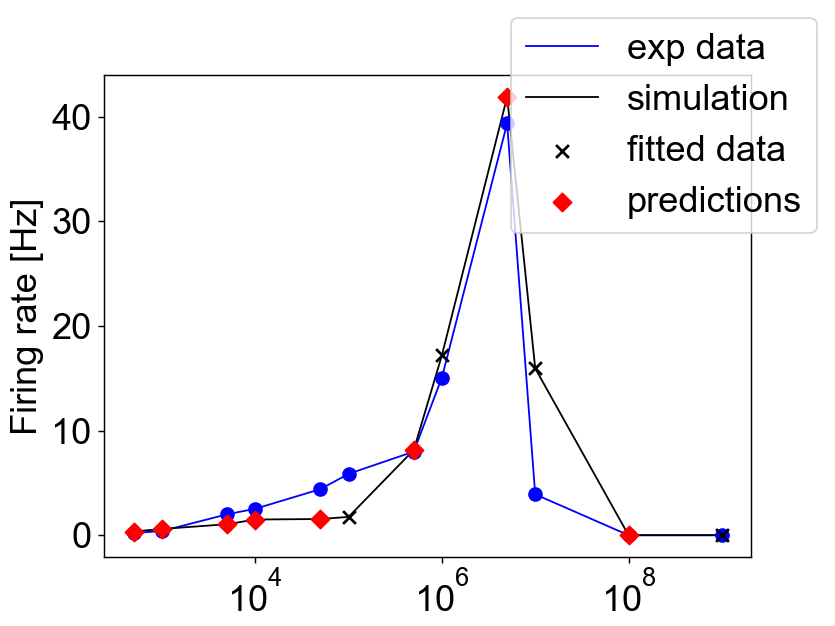

In [5]:
color_data = 'blue' # see here to see available colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
color_sim = 'k'

marker_fitted_data = 'x' # can be changed to any of those: https://matplotlib.org/stable/api/markers_api.html
marker_predicted_data = 'D'

marker_size = 50
linewidth = 1

fig = plt.figure()
ax = fig.add_subplot(111)
# First, plot the actual data
ax.scatter(exp_conc_as_int, Or42bSF_EtB_mean, c=color_data, s=marker_size, zorder=1)
ax.plot(exp_conc_as_int, Or42bSF_EtB_mean, c=color_data, label='exp data', lw=linewidth, zorder=0)


# Finally, collect everything with a line for easier visibility
ax.plot(concentrations, mean_PSTH, color=color_sim, label='simulation', lw=linewidth, zorder=0)

# Next, plot ONLY the data Philip used for fitting
indeces_to_plot = []
for current_i in range(len(fitted_data)):
    indeces_to_plot.append(np.where(np.array(concentrations) == np.array(fitted_data)[current_i])[0][0])
indeces_to_plot = np.array(indeces_to_plot)
ax.scatter(np.array(concentrations)[indeces_to_plot], 
           np.array(mean_PSTH)[indeces_to_plot], 
           c=color_sim, marker=marker_fitted_data,
          label='fitted data', s=marker_size,zorder=1)


# Then plot ONLY PREDICTED simulation_data
indeces_to_plot = []
for current_i in range(len(predicted_data)):
    indeces_to_plot.append(np.where(np.array(concentrations) == np.array(predicted_data)[current_i])[0][0])
indeces_to_plot = np.array(indeces_to_plot)
ax.scatter(np.array(concentrations)[indeces_to_plot], 
           np.array(mean_PSTH)[indeces_to_plot], 
           c=color_for_predicted, marker=marker_predicted_data,
          label='predictions', s=marker_size,zorder=1)


ax.set_xscale('log')

ax.set_ylabel('Firing rate [Hz]')
ax.set_xlabel('Concentration [pM]')

fig.legend()

#fig.savefig(Path(save_path, 'Fig5E_dose_response.svg'))